<a href="https://colab.research.google.com/github/LMVR92/Titanic_Competition_LMVR/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

sns.set_style('whitegrid')

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

In [ ]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Selection of variables
train = train [['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

train['Survived_str'] = train['Survived'].map({0: 'No', 1: 'Yes'})
train['Sex_int'] = train['Sex'].map({'male': 0, 'female': 1})

train = train[['Survived', 'Survived_str', 'Sex', 'Sex_int', 'Age', 'Pclass', 'Fare']]

print(train.head(15))

    Survived Survived_str     Sex  Sex_int   Age  Pclass     Fare
0          0           No    male        0  22.0       3   7.2500
1          1          Yes  female        1  38.0       1  71.2833
2          1          Yes  female        1  26.0       3   7.9250
3          1          Yes  female        1  35.0       1  53.1000
4          0           No    male        0  35.0       3   8.0500
5          0           No    male        0   NaN       3   8.4583
6          0           No    male        0  54.0       1  51.8625
7          0           No    male        0   2.0       3  21.0750
8          1          Yes  female        1  27.0       3  11.1333
9          1          Yes  female        1  14.0       2  30.0708
10         1          Yes  female        1   4.0       3  16.7000
11         1          Yes  female        1  58.0       1  26.5500
12         0           No    male        0  20.0       3   8.0500
13         0           No    male        0  39.0       3  31.2750
14        

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Survived_str  891 non-null    object 
 2   Sex           891 non-null    object 
 3   Sex_int       891 non-null    int64  
 4   Age           714 non-null    float64
 5   Pclass        891 non-null    int64  
 6   Fare          891 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [10]:
# Found how many NA do we have
print(train.isna().sum())
print(' ')
print(train.isna().mean() * 100)

Survived          0
Survived_str      0
Sex               0
Sex_int           0
Age             177
Pclass            0
Fare              0
dtype: int64
 
Survived         0.00000
Survived_str     0.00000
Sex              0.00000
Sex_int          0.00000
Age             19.86532
Pclass           0.00000
Fare             0.00000
dtype: float64


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

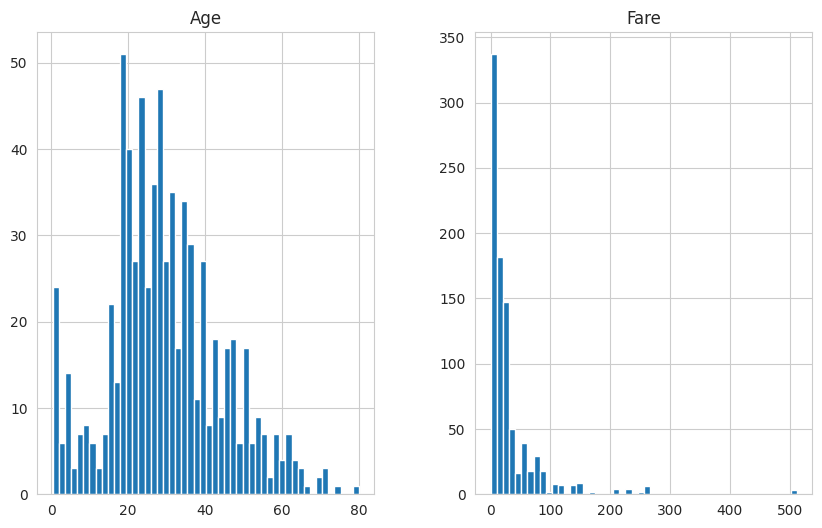

In [12]:
train[['Age', 'Fare']].hist(bins=50, figsize=(10, 6))

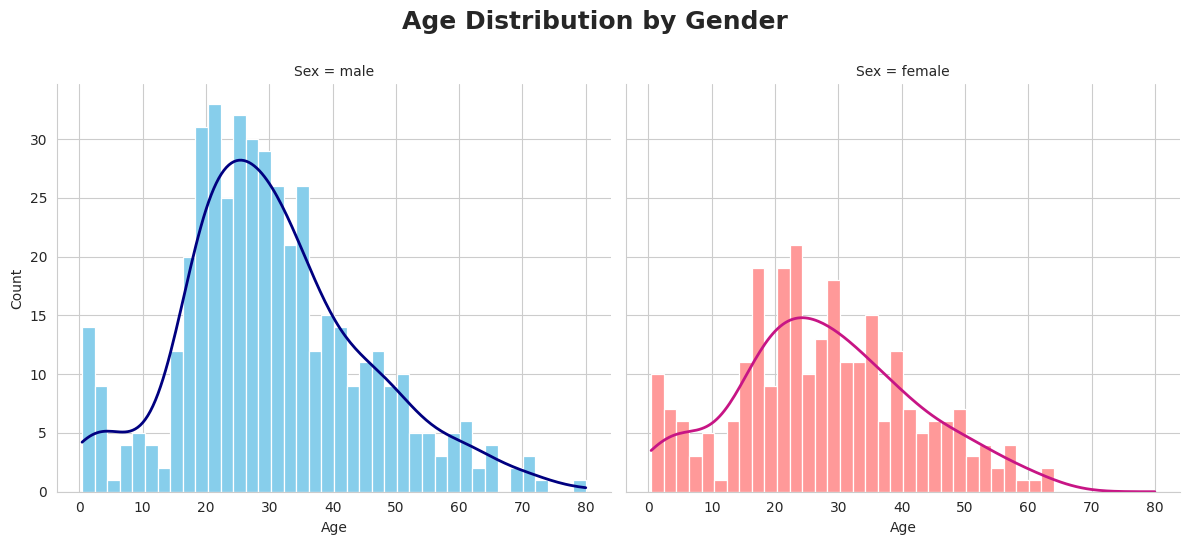

In [13]:
g = sns.displot(data=train,
                x='Age',
                col='Sex',
                kde=True,
                bins=40,
                alpha=0.7,
                height=5,
                aspect=1.2)

colors = {'male': '#87CEEB', 'female': '#FF9999'}
kde_colors = {'male': '#000080', 'female': '#C71585'}

for (col_val, ax) in zip(['male', 'female'], g.axes.flat):

    for patch in ax.patches:
        patch.set_facecolor(colors[col_val])
        patch.set_edgecolor('white')

    for line in ax.lines:
        line.set_color(kde_colors[col_val])
        line.set_linewidth(2)

g.fig.suptitle('Age Distribution by Gender',
               fontsize=18,
               fontweight='bold',
               y=1.08)

plt.show()

In [14]:
for sex in ['male', 'female']:
    print(f"Average age of {sex} - {round(train[train['Sex'] == sex]['Age'].mean(), 2)} years")
    for pclass in [1, 2, 3]:
        print(f"Average age of {sex} in {pclass}st class - {round(train[(train['Sex'] == sex) & (train['Pclass'] == pclass)]['Age'].mean(), 2)} years")
    print()

print(f"Average age of Titanic passenger - {round(train['Age'].mean(), 2)} year")

Average age of male - 30.73 years
Average age of male in 1st class - 41.28 years
Average age of male in 2st class - 30.74 years
Average age of male in 3st class - 26.51 years

Average age of female - 27.92 years
Average age of female in 1st class - 34.61 years
Average age of female in 2st class - 28.72 years
Average age of female in 3st class - 21.75 years

Average age of Titanic passenger - 29.7 year


In [15]:
# How many people survived?
print(train['Survived_str'].value_counts())


Survived_str
No     549
Yes    342
Name: count, dtype: int64


Text(0, 0.5, 'The num. of passengers')

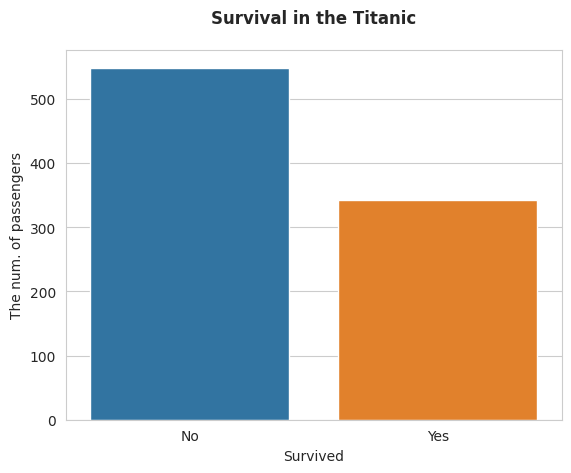

In [17]:
sns.countplot(data=train,
              x='Survived_str',
              hue='Survived_str')

plt.title('Survival in the Titanic', fontweight='bold', y=1.05)
plt.xlabel('Survived')
plt.ylabel('The num. of passengers')

Text(0.5, 0, 'Sex')

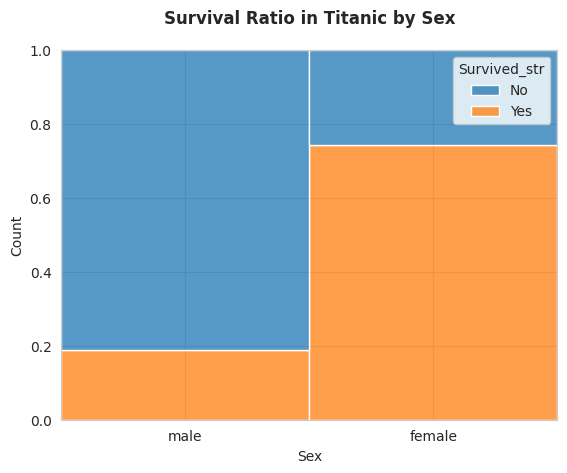

In [25]:
sns.histplot(
    data=train,
    x='Sex',
    hue='Survived_str',
    multiple='fill'
)
plt.title('Survival Ratio in Titanic by Sex', fontweight='bold', y=1.05)
plt.xlabel('Sex')



In [26]:
print(train.groupby(['Sex', 'Pclass'])['Survived_str'].value_counts())

Sex     Pclass  Survived_str
female  1       Yes              91
                No                3
        2       Yes              70
                No                6
        3       No               72
                Yes              72
male    1       No               77
                Yes              45
        2       No               91
                Yes              17
        3       No              300
                Yes              47
Name: count, dtype: int64


In [28]:
corr_matrix = train[['Survived', 'Pclass', 'Sex_int', 'Age']].corr()
print(corr_matrix["Survived"].sort_values(ascending=False))

Survived    1.000000
Sex_int     0.543351
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64


In [31]:
from sklearn.linear_model import LogisticRegression

x = train[['Pclass', 'Sex_int','Pclass']]
y = train['Survived']

titanic_model = LogisticRegression().fit(x, y)

In [33]:
import statsmodels.api as sm

x = train[['Pclass', 'Sex_int']]
y = train['Survived']

x = sm.add_constant(x)

model = sm.Logit(y, x)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.464195
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Fri, 15 Aug 2025   Pseudo R-squ.:                  0.3029
Time:                        03:41:34   Log-Likelihood:                -413.60
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 8.798e-79
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6512      0.241      2.703      0.007       0.179       1.124
Pclass        -0.9606      0.

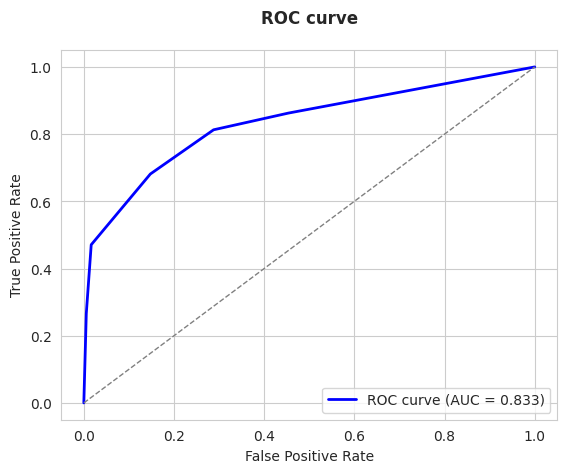

In [34]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = result.predict(x)
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # линия случайного классификатора
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve', fontweight='bold', y=1.05)
plt.legend(loc="lower right")
plt.show()

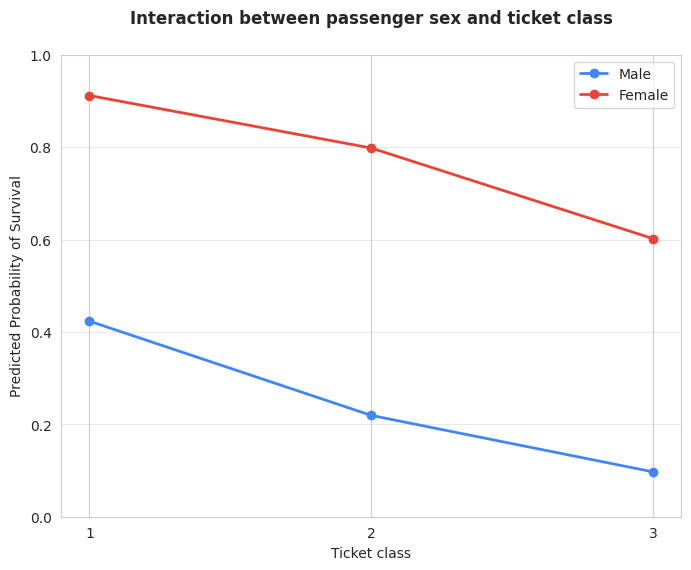

In [35]:
b = result.params

pclass_vals = [1, 2, 3]
sex_vals = [0, 1]
colors = {'Male': '#4285F4', 'Female': '#EA4335'}

plt.figure(figsize=(8,6))

plt.grid(True, axis='y', alpha=0.6, linestyle='-', linewidth=0.5)

for s in sex_vals:
    probs = []
    for p in pclass_vals:
        logit = (b['const']
                + b['Pclass'] * p
                + b['Sex_int'] * s
                 )
        prob = 1 / (1 + np.exp(-logit))
        probs.append(prob)

    label = 'Female' if s == 1 else 'Male'

    plt.plot(pclass_vals, probs, marker='o', label=label,
             linewidth=2, color=colors[label])

plt.xlabel('Ticket class')
plt.ylabel('Predicted Probability of Survival')
plt.title('Interaction between passenger sex and ticket class',
          fontweight='bold', y=1.05)
plt.legend()
plt.xticks([1, 2, 3])
plt.ylim(0, 1)
plt.show()

In [42]:
test['Sex_int'] = test['Sex'].map({'male': 0, 'female': 1})
test['Pclass*Sex_int'] = test['Pclass'] * test['Sex_int']

X_test = test[['Pclass', 'Sex_int']]
X_test = sm.add_constant(X_test)

In [43]:
survival_probabilities = result.predict(X_test)
survival_predictions = (survival_probabilities > 0.5).astype(int)

test['Survived_pred'] = survival_predictions
test['Survived_prob'] = survival_probabilities

In [45]:
print(test[['Sex', 'Pclass', 'Age', 'Survived_pred', 'Survived_prob']].head(20))

       Sex  Pclass   Age  Survived_pred  Survived_prob
0     male       3  34.5              0       0.097052
1   female       3  47.0              1       0.601803
2     male       2  62.0              0       0.219281
3     male       3  27.0              0       0.097052
4   female       3  22.0              1       0.601803
5     male       3  14.0              0       0.097052
6   female       3  30.0              1       0.601803
7     male       2  26.0              0       0.219281
8   female       3  18.0              1       0.601803
9     male       3  21.0              0       0.097052
10    male       3   NaN              0       0.097052
11    male       1  46.0              0       0.423283
12  female       1  23.0              1       0.911661
13    male       2  63.0              0       0.219281
14  female       1  47.0              1       0.911661
15  female       2  24.0              1       0.797951
16    male       2  35.0              0       0.219281
17    male

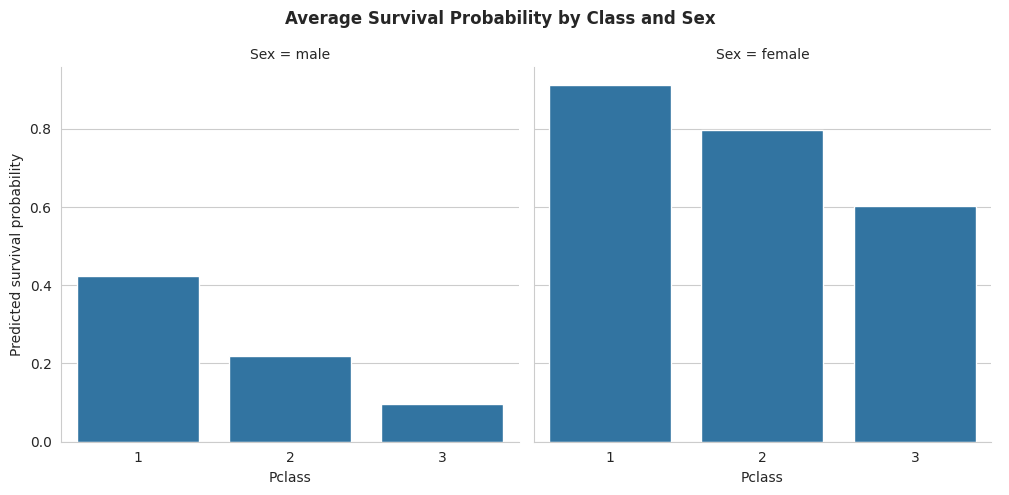

In [46]:
g = sns.catplot(data=test,
                x='Pclass',
                y='Survived_prob',
                col='Sex',
                kind='bar',
                estimator=np.mean)

g.set_ylabels('Predicted survival probability')
plt.suptitle('Average Survival Probability by Class and Sex', fontweight='bold')
plt.tight_layout()
plt.show()

### Conclution
## If are you a first class female you have more than 80% survival probability and even if you are a thirt class  female you have more survival probability than a male on first class. The worst case, you are a male on thirt class because you have less than 15% survival probability.

In [ ]:
survival_probabilities = result.predict(X_test)
survival_predictions = (survival_probabilities > 0.5).astype(int)

test['Survived_pred'] = survival_predictions
test['Survived_prob'] = survival_probabilities